In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankmarketing/bankmarketing.csv


# **Let's assume this as coding practice**

## 1. Data Accessing

In [2]:
marketing = pd.read_csv('/kaggle/input/bankmarketing/bankmarketing.csv')
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 20 default attributes available in this dataset. It contained:
* around 41 thousands row of records with none of them contains null values
* Data Types: 5 -> float64, 5 -> int 64 and 10 -> object
* 6.6MB+ memory usage

In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It's discovered that some of the attributes contains negative values, this is something new from technical perspective.

In [4]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


The breakdown of numbers of unique values for each attributes:

In [5]:
marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
index = marketing.columns
index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# To determine if there is any duplicate columns at index
marketing.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### 1.1 Age
There is no age between 17 to 98 not discoverable in this dataset.

In [8]:
var = marketing['age'].unique()
sorted_var = np.sort(var)
print(sorted_var)
print(f"Data Type： {sorted_var.dtype}")

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
Data Type： int64


### 1.2 Job
12 jobs were discovered in this dataset, such as:

In [9]:
var = marketing['job'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Data Type： object


### 1.3 Marital

In [10]:
var = marketing['marital'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['married' 'single' 'divorced' 'unknown']
Data Type： object


### 1.4 Education

In [11]:
marketing['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

### 1.5 Default

In [12]:
marketing['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

### 1.6 Housing

In [13]:
marketing['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

### 1.7 Loan

In [14]:
marketing['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

### 1.8 Contact

In [15]:
marketing['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

### 1.9 Month

This dataset seems containing data from April to December only, can we assume this as the subset of another dataset?

In [16]:
marketing['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

### 1.10 day_of_week

In [17]:
marketing['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

### 1.11 Duration

In [18]:
var = marketing['duration'].unique()
print(var)
print(f"Data Type： {var.dtype}")

[ 261  149  226 ... 1246 1556 1868]
Data Type： int64


### 1.12 Campaign

In [19]:
var = np.sort(
    marketing['campaign'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]
Data Type： int64


### 1.13 pdays

In [20]:
var = np.sort(
    marketing['pdays'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]
Data Type： int64


In [21]:
var = marketing['previous'].unique()
print(var)
print(f"Data Type： {var.dtype}")

[0 1 2 3 4 5 6 7]
Data Type： int64


In [22]:
marketing['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [23]:
var = np.sort(
    marketing['emp.var.rate'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[-3.4 -3.  -2.9 -1.8 -1.7 -1.1 -0.2 -0.1  1.1  1.4]
Data Type： float64


In [24]:
var = np.sort(
    marketing['cons.price.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[92.201 92.379 92.431 92.469 92.649 92.713 92.756 92.843 92.893 92.963
 93.075 93.2   93.369 93.444 93.749 93.798 93.876 93.918 93.994 94.027
 94.055 94.199 94.215 94.465 94.601 94.767]
Data Type： float64


In [25]:
var = np.sort(
    marketing['cons.conf.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[-50.8 -50.  -49.5 -47.1 -46.2 -45.9 -42.7 -42.  -41.8 -40.8 -40.4 -40.3
 -40.  -39.8 -38.3 -37.5 -36.4 -36.1 -34.8 -34.6 -33.6 -33.  -31.4 -30.1
 -29.8 -26.9]
Data Type： float64


In [26]:
var = np.sort(
    marketing['euribor3m'].unique()
)

print(var)
print(f"Data Type： {var.dtype}")

[0.634 0.635 0.636 0.637 0.638 0.639 0.64  0.642 0.643 0.644 0.645 0.646
 0.649 0.65  0.651 0.652 0.653 0.654 0.655 0.659 0.663 0.668 0.672 0.677
 0.682 0.683 0.684 0.685 0.688 0.69  0.692 0.695 0.697 0.699 0.7   0.701
 0.702 0.704 0.706 0.707 0.708 0.709 0.71  0.711 0.712 0.713 0.714 0.715
 0.716 0.717 0.718 0.719 0.72  0.721 0.722 0.723 0.724 0.727 0.728 0.729
 0.73  0.731 0.732 0.733 0.735 0.737 0.739 0.74  0.741 0.742 0.743 0.744
 0.748 0.749 0.75  0.752 0.753 0.754 0.755 0.761 0.762 0.766 0.767 0.768
 0.77  0.771 0.773 0.778 0.781 0.782 0.788 0.79  0.793 0.797 0.802 0.803
 0.809 0.81  0.813 0.819 0.821 0.822 0.825 0.827 0.829 0.834 0.835 0.838
 0.84  0.843 0.846 0.849 0.851 0.854 0.859 0.861 0.869 0.87  0.873 0.876
 0.877 0.878 0.879 0.88  0.881 0.882 0.883 0.884 0.885 0.886 0.888 0.889
 0.89  0.891 0.893 0.894 0.895 0.896 0.898 0.899 0.9   0.903 0.904 0.905
 0.908 0.914 0.921 0.927 0.933 0.937 0.942 0.944 0.953 0.956 0.959 0.965
 0.969 0.972 0.977 0.979 0.982 0.985 0.987 0.993 0.

In [27]:
var = np.sort(
    marketing['nr.employed'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

[4963.6 4991.6 5008.7 5017.5 5023.5 5076.2 5099.1 5176.3 5191.  5195.8
 5228.1]
Data Type： float64


In [28]:
marketing['y'].unique()

array(['no', 'yes'], dtype=object)

## 2. Data Cleaning

There were 12 rows of duplicated rows of records detected and identified.

In [29]:
marketing.duplicated().sum()

12

In [30]:
marketing.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [31]:
# Reference: https://www.youtube.com/watch?v=g8o7zjeL3js&t=238s
duplicated_rows = marketing[marketing.duplicated()]
duplicated_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [32]:
marketing_cleaned = marketing.drop_duplicates()
marketing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## 3. EDA

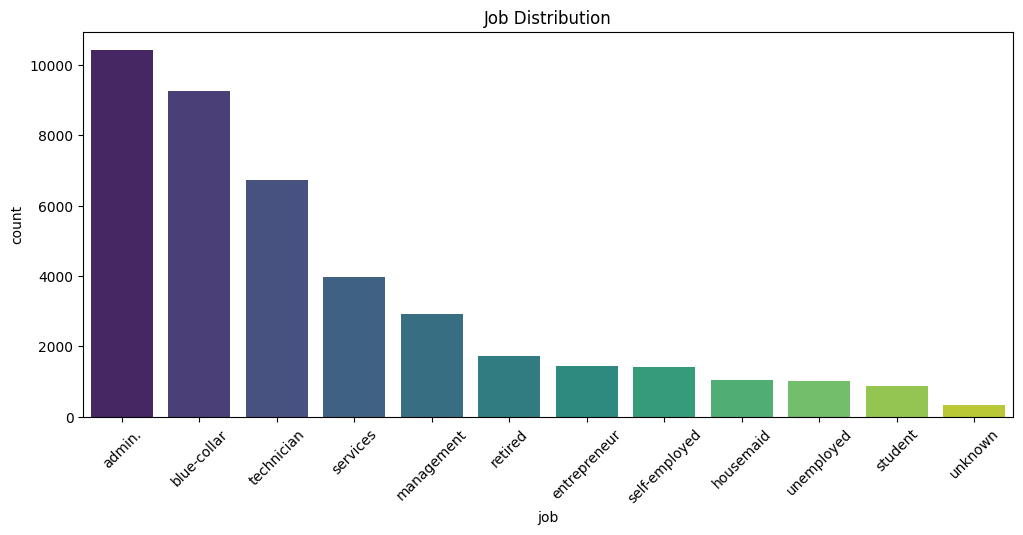

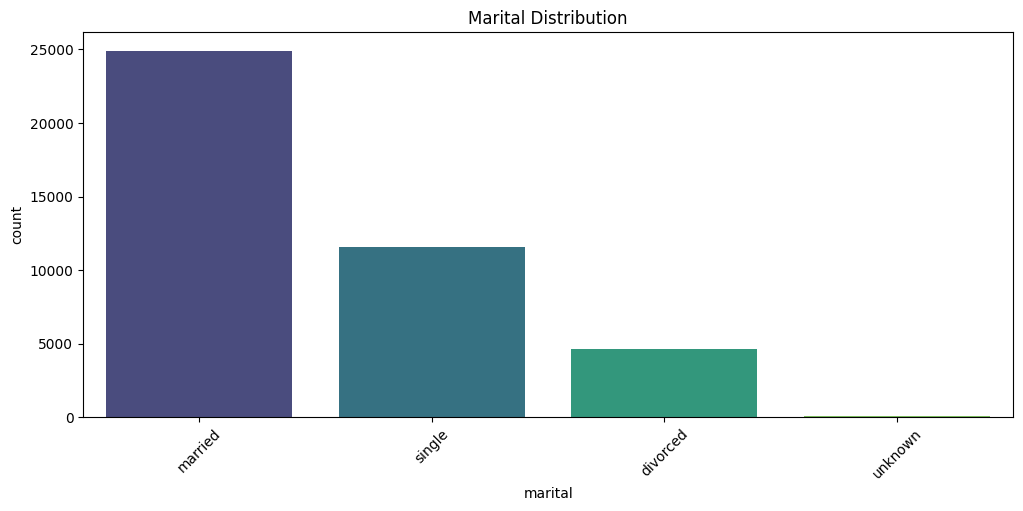

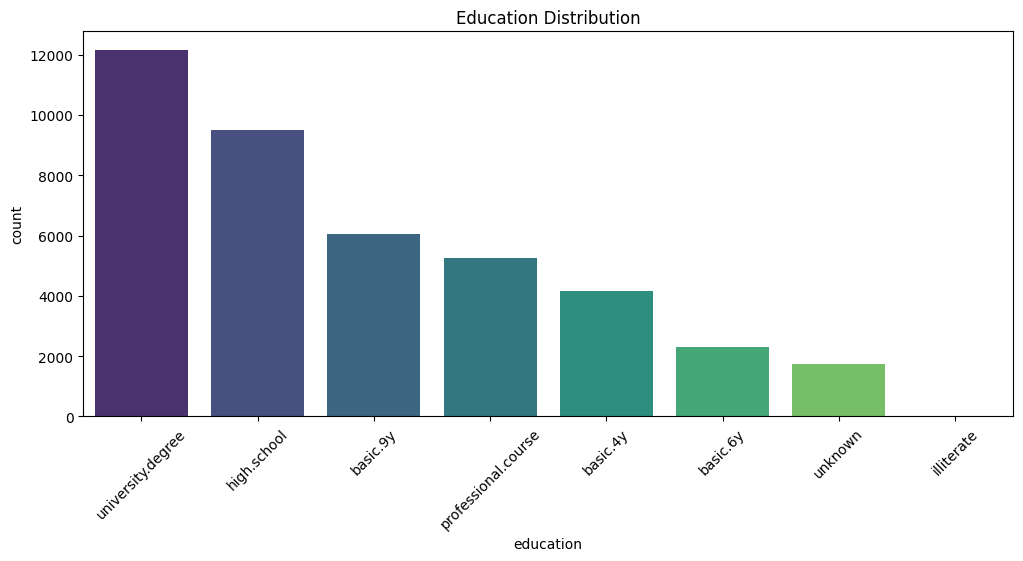

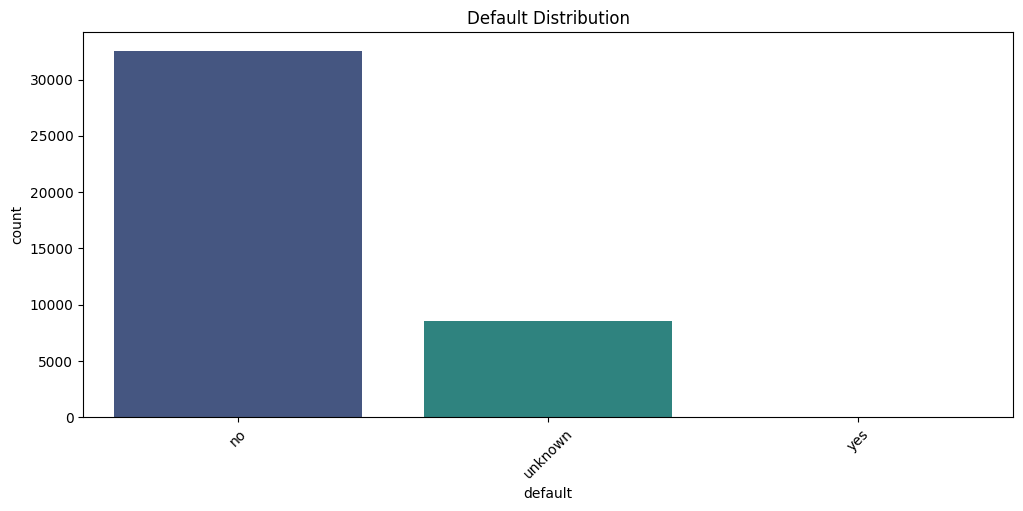

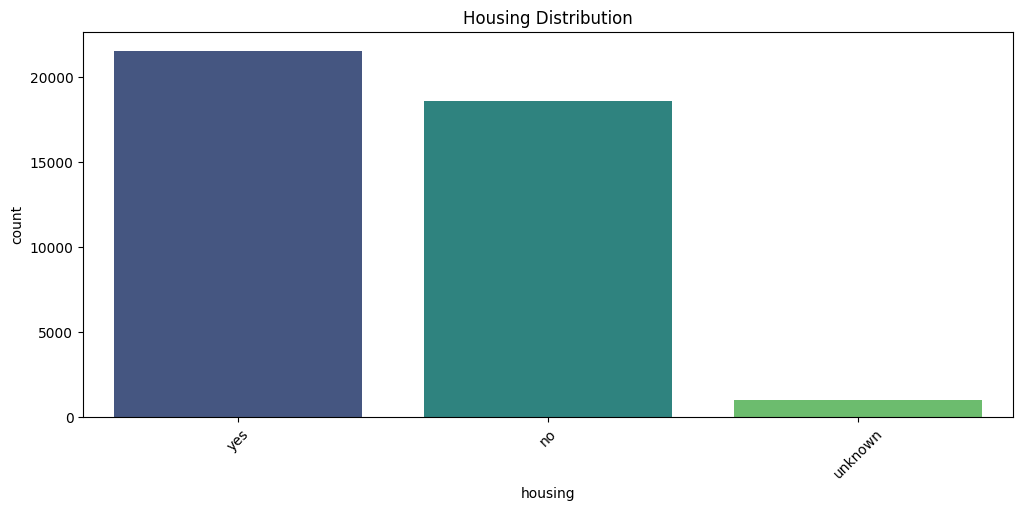

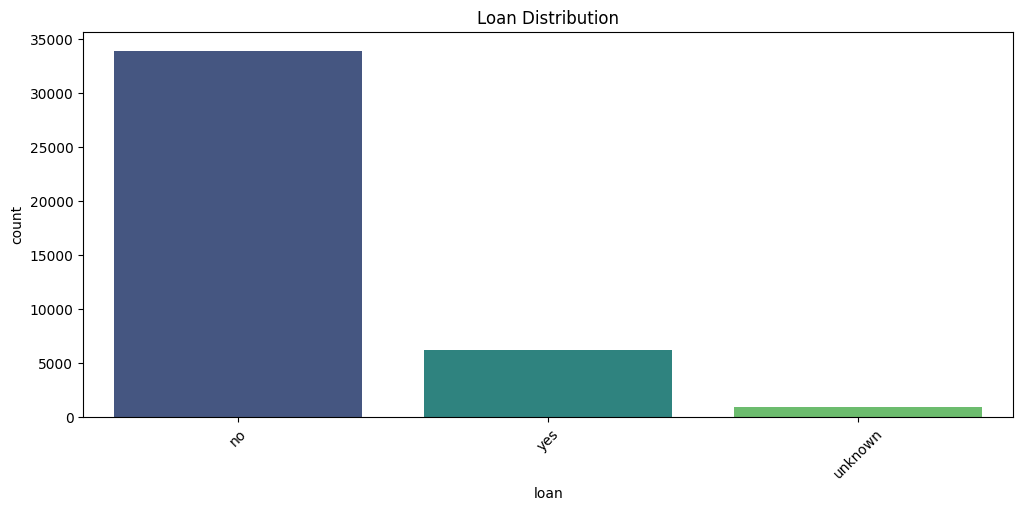

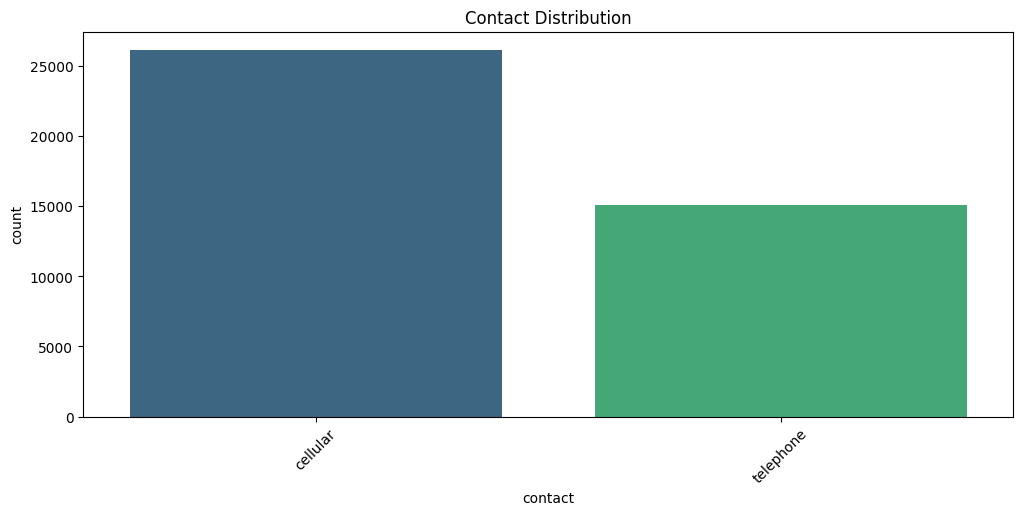

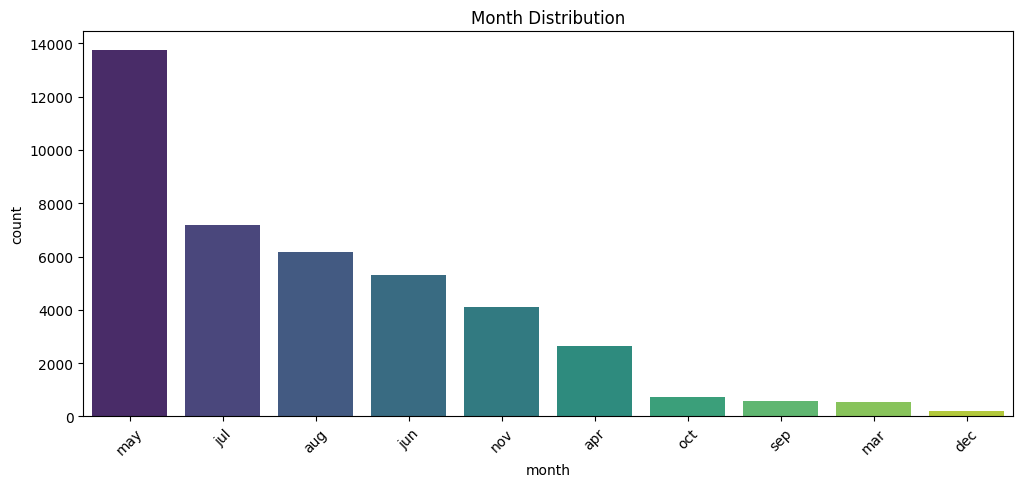

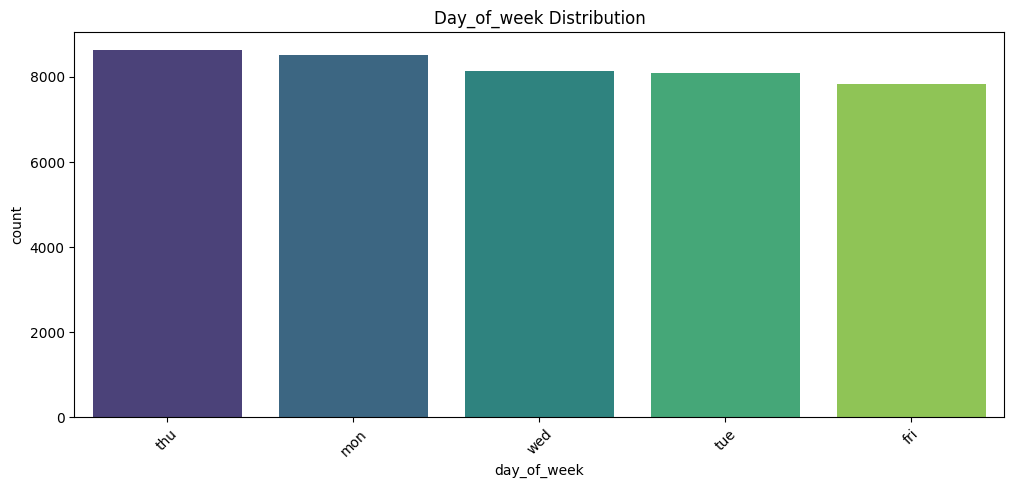

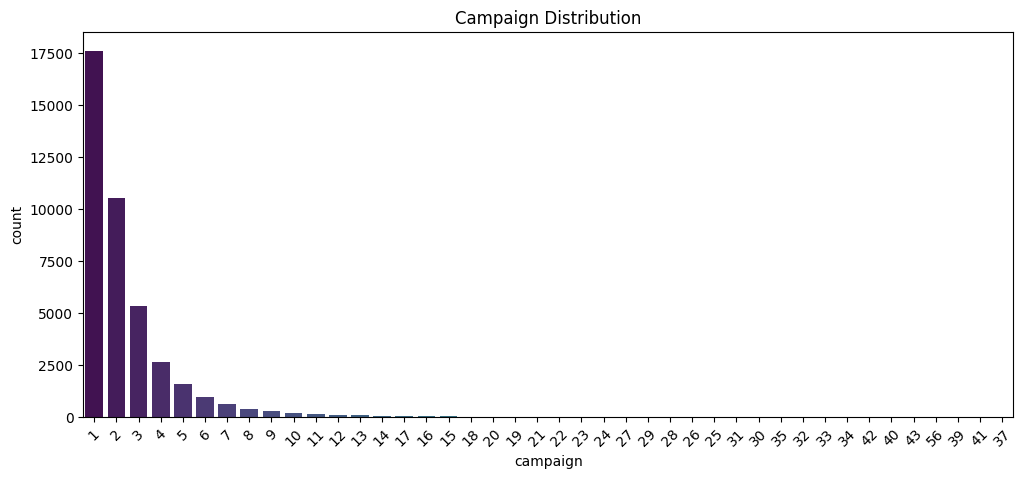

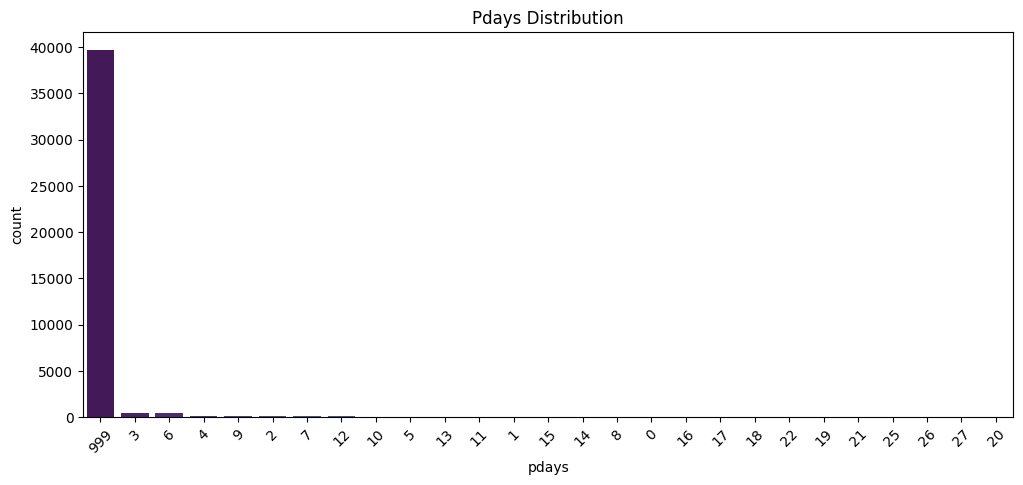

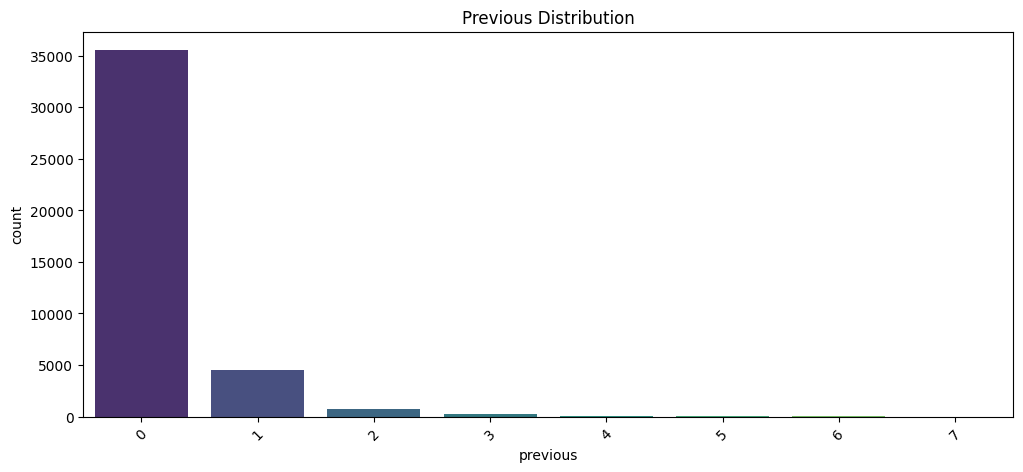

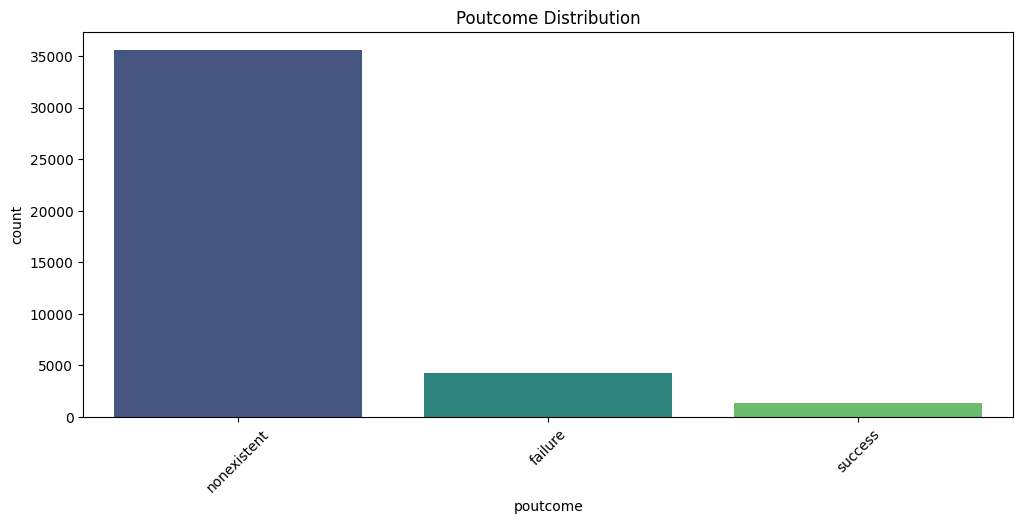

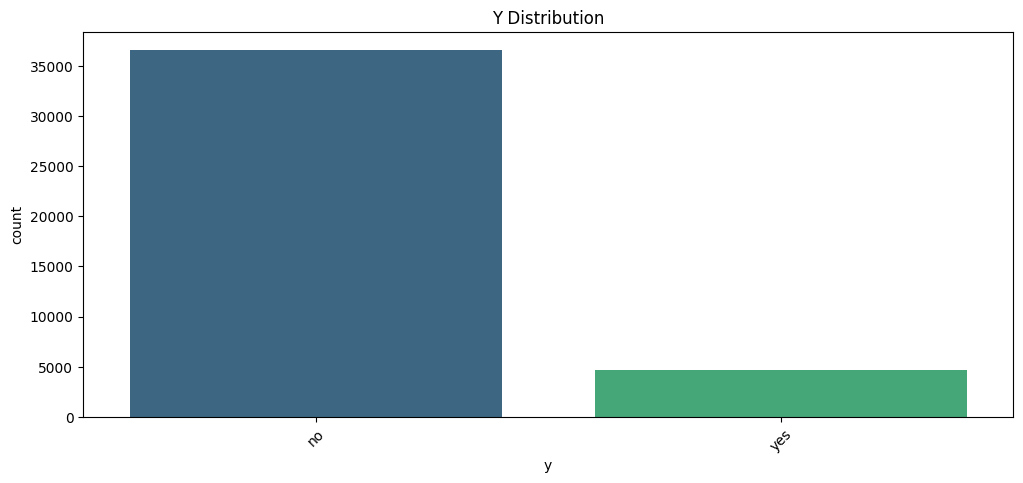

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

cat_cols = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',  
    'campaign', 
    'pdays',
    'previous',
    'poutcome',
    'y'
]

for col in cat_cols:
    plt.figure(figsize=(12,5))
    order = marketing_cleaned[col].value_counts().index
    sns.countplot(x=col, data=marketing_cleaned, order = order, palette="viridis")
    plt.title(f"{col.capitalize()} Distribution") #capitalize the first word
    plt.xticks(rotation=45)
    plt.show()

In [34]:
marketing_cleaned[['duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,258.315815,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,259.305321,1.570883,0.578839,4.627860,1.734437,72.251364
min,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


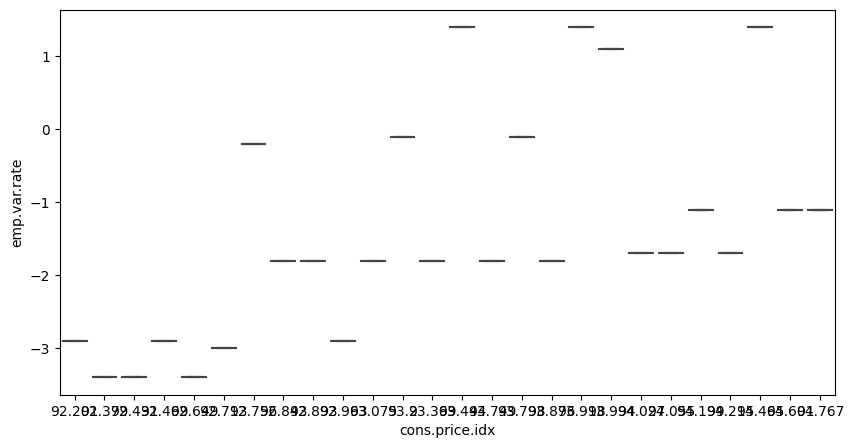

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cons.price.idx', y='emp.var.rate', data=marketing_cleaned)
plt.title("")
plt.show()

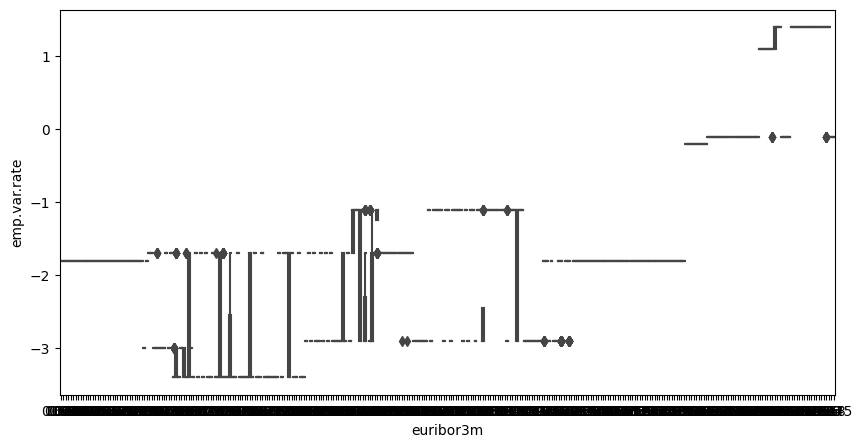

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='euribor3m', y='emp.var.rate', data=marketing_cleaned)
plt.title("")
plt.show()

## 4. Logistic Regression (Incomplete)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
X = marketing_cleaned.drop('y', axis = 1)
y = marketing_cleaned['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify = y, 
                                                    random_state=2022)

## 5. Archive (Linear Regression)

In [39]:
import numpy as np

# Sample data
X = np.array(marketing_cleaned['euribor3m'])
y = np.array(marketing_cleaned['emp.var.rate'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")

Slope (b1): 0.8805629307793787
Intercept (b0): -3.106855263791139
Predicted values: [ 1.17003889  1.17003889  1.17003889 ... -2.20163657 -2.20163657
 -2.20163657]


In [40]:
# Sample data
X = np.array(marketing_cleaned['duration'])
y = np.array(marketing_cleaned['nr.employed'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")

Slope (b1): -0.012447065581045254
Intercept (b0): 5170.2501437174815
Predicted values: [5167.0014596  5168.39553095 5167.4371069  ... 5167.89764832 5164.74854073
 5167.27529504]
